In [70]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Kernel Ridge Regression

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from models.kernel_rid_reg import LinKRR, GaussKRR

## Point clouds

In [72]:
n, d = 500, 2
regularization_tradeoff = 100
n_train, n_test = n//2, n//2

X1 = np.random.multivariate_normal(
    mean=[-1, 1], cov=[[1, 0], [0, 1]], size=n//2)
X2 = np.random.multivariate_normal(
    mean=[1, -1], cov=[[1, 0], [0, 1]], size=n//2)

data = np.concatenate([X1, X2])
indices = np.random.permutation(n)

train_indices, test_indices = indices[:n_train], indices[n_train:n_train+n_test]
train_data, test_data = data[train_indices],  data[test_indices]

labels = np.concatenate([np.zeros(n//2), np.ones(n//2)])
train_labels, test_labels = labels[train_indices], labels[test_indices]

In [73]:
classifier = LinKRR(train_data, train_labels, regularization_tradeoff)
classifier.fit()
predictions = classifier.predict_test(test_data)
accuracy = np.mean(test_labels == predictions)
print(f'Accuracy = {accuracy}')

Accuracy = 0.936


In [74]:
classifier = GaussKRR(train_data, train_labels, 100, 1.5)
classifier.fit()
predictions = classifier.predict_test(test_data)
accuracy = np.mean(test_labels == predictions)
print(f'Accuracy = {accuracy}')

Accuracy = 0.92


In [75]:
TRAIN_DATA_PATH = 'data/Xtr0.csv'
TRAIN_EMBEDDING_PATH = 'data/Xtr0_mat100.csv'
TRAIN_LABEL_PATH = 'data/Ytr0.csv'

In [76]:
n_train, n_test = 1500, 500

data = np.loadtxt(TRAIN_DATA_PATH, dtype=str,
                  delimiter=',', skiprows=1, usecols=1)

embeddings = np.loadtxt(TRAIN_EMBEDDING_PATH)
train_embeddings, test_embeddings = embeddings[:n_train], embeddings[n_train:n_train+n_test]
    
labels = pd.read_csv(TRAIN_LABEL_PATH, index_col=0).to_numpy().squeeze()
train_labels, test_labels = labels[:n_train], labels[n_train:n_train+n_test]

## Linear kernel

In [86]:
regularisation = [0.01, 0.05, 0.1, 0.5, 1, 10]
accuracies = []

for reg_lambda in regularisation:
    classifier = LinKRR(train_embeddings, train_labels, reg_lambda)
    classifier.fit()
    predictions = classifier.predict_test(test_embeddings)
    accuracy = np.mean(test_labels == predictions)
    accuracies.append(accuracy)

[0.576, 0.59, 0.566, 0.58, 0.568, 0.524]


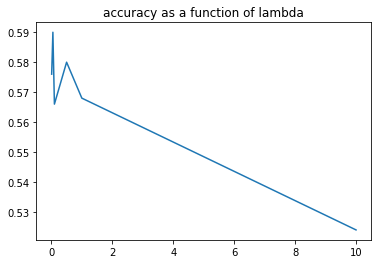

In [87]:
plt.plot(regularisation, accuracies)
plt.title("accuracy as a function of lambda")
plt.show()

In [100]:
sig = np.linspace(1e-4, 1e-2, 100)
accuracies = []

for s in sig:
    classifier = GaussKRR(train_embeddings, train_labels, 5, s)
    classifier.fit()
    predictions = classifier.predict_test(test_embeddings)
    accuracy = np.mean(test_labels == predictions)
    accuracies.append(accuracy)

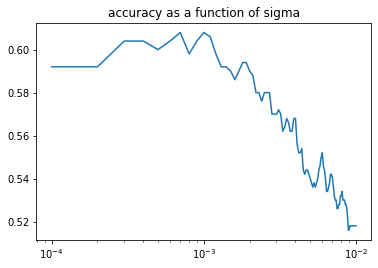

In [102]:
plt.plot(sig, accuracies)
plt.title("accuracy as a function of sigma")
plt.xscale('log') 

plt.show()

In [114]:
regularisation = np.linspace(1e-6, 1000, 10)
accuracies = []

for reg_lambda in regularisation:
    classifier = GaussKRR(train_embeddings, train_labels, reg_lambda, 7e-4)
    classifier.fit()
    predictions = classifier.predict_test(test_embeddings)
    accuracy = np.mean(test_labels == predictions)
    accuracies.append(accuracy)

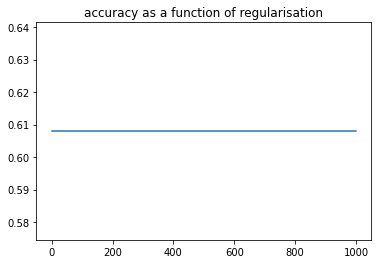

In [115]:
plt.plot(regularisation, accuracies)
plt.title("accuracy as a function of regularisation")

plt.show()